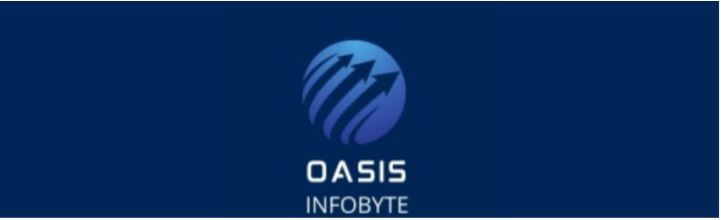

 ## Oasis Internship, January- 2024
 
 ### Samala Sandeep, Data Analytics Intern

# Project Title: Predicting House Prices with Linear Regression 

## Dataset Link : https://www.kaggle.com/datasets/ashydv/housing-dataset

# Introduction:

The project aims to develop a predictive model using linear regression, a foundational machine learning algorithm. Linear regression is particularly useful for estimating numerical outcomes based on a set of relevant features. This hands-on project provides an opportunity to gain practical experience in the entire machine learning workflow, from data collection to model evaluation and interpretation.

# Key Concepts and Challenges:


## Data Collection:

Obtain a dataset with numerical features and a target variable for prediction. The dataset should be representative of the problem at hand and contain sufficient information for building a reliable predictive model.


## Data Exploration and Cleaning:

Conduct a thorough exploration of the dataset to understand its structure, distribution, and characteristics. Handle missing values, outliers, and ensure data quality to create a reliable foundation for model development.


# Feature Selection:

Identify and select relevant features that are likely to contribute to the predictive model. This step involves assessing the correlation between different features and the target variable to choose the most informative ones.


# Model Training:

Implement linear regression using a machine learning library, such as Scikit-Learn in Python. Train the model on a portion of the dataset, known as the training set, to learn the underlying patterns and relationships within the data.


## Model Evaluation:

Evaluate the performance of the linear regression model on a separate test dataset. Use metrics such as Mean Squared Error (MSE) or R-squared to quantify how well the model predicts the target variable. This step helps assess the model's generalization to new, unseen data.


## Visualization:

Create visualizations to illustrate the relationship between the predicted and actual values. Visualization aids in interpreting the model's predictions and understanding how well it captures the patterns in the data. Common visualizations include scatter plots, regression lines, and residual plots.

# Import Libraries and Load Dataset:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df = pd.read_csv('Task5.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Exploratory Data Analysis (EDA):

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It involves exploring and understanding the main characteristics of the dataset to derive meaningful insights and inform further analysis. The goal of EDA is to gain a deeper understanding of the data, identify patterns, relationships, and potential outliers, and make informed decisions about data preprocessing and modeling. 

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Data Cleaning:

Data cleaning is a critical step in the data analysis process that involves identifying and addressing issues with the dataset to ensure its quality and reliability. The goal is to handle missing values, outliers, and any inconsistencies in the data.

In [8]:
# Convertinto float
df.isnull().sum()*100/df.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

# Outlier Analysis

Outlier analysis is a process of identifying and handling outliers in a dataset. Outliers are data points that significantly deviate from the majority of the data and can have a substantial impact on statistical analyses. 


Identification: Outliers can be identified using statistical methods, such as boxplots, scatter plots, or mathematical techniques like the Interquartile Range (IQR). In a boxplot, outliers are often represented as individual points beyond the "whiskers" of the box.


Boxplots: Boxplots provide a visual representation of the distribution of a dataset. The box represents the interquartile range (IQR), and data points outside the whiskers (typically 1.5 times the IQR) are considered potential outliers.


Scatter Plots: In scatter plots, outliers may be visible as data points that lie far away from the general trend or cluster of points. Analyzing scatter plots can help identify unusual observations.


Statistical Methods: Techniques like the IQR method involve calculating the range within which most of the data points lie and then identifying points outside this range as potential outliers.


Impact on Analysis: Outliers can affect statistical measures such as mean and standard deviation, leading to skewed results. It's essential to understand whether outliers are valid data points or errors in the dataset.


Handling Outliers: Depending on the nature of the data and the objectives of the analysis, outliers can be handled by removing them, transforming the data, or using robust statistical methods that are less sensitive to extreme values.

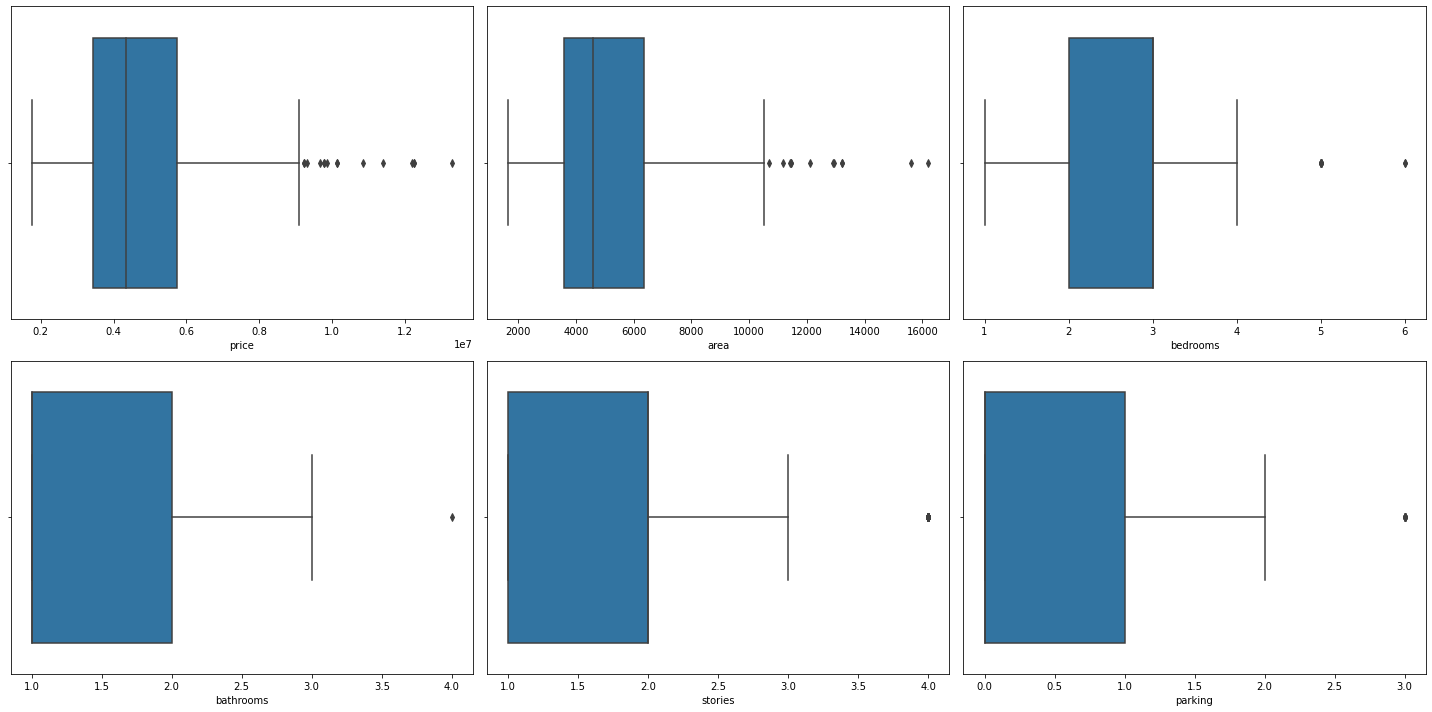

In [9]:

fig, axs = plt.subplots(2,3, figsize = (20,10))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

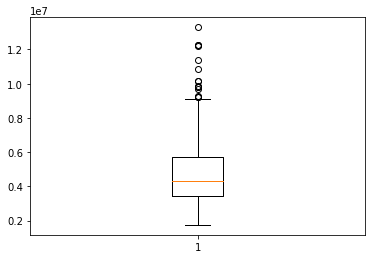

In [10]:
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

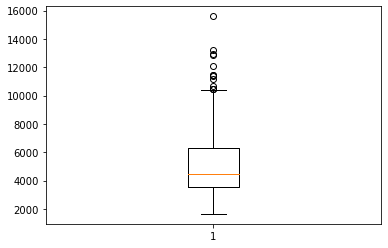

In [11]:
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

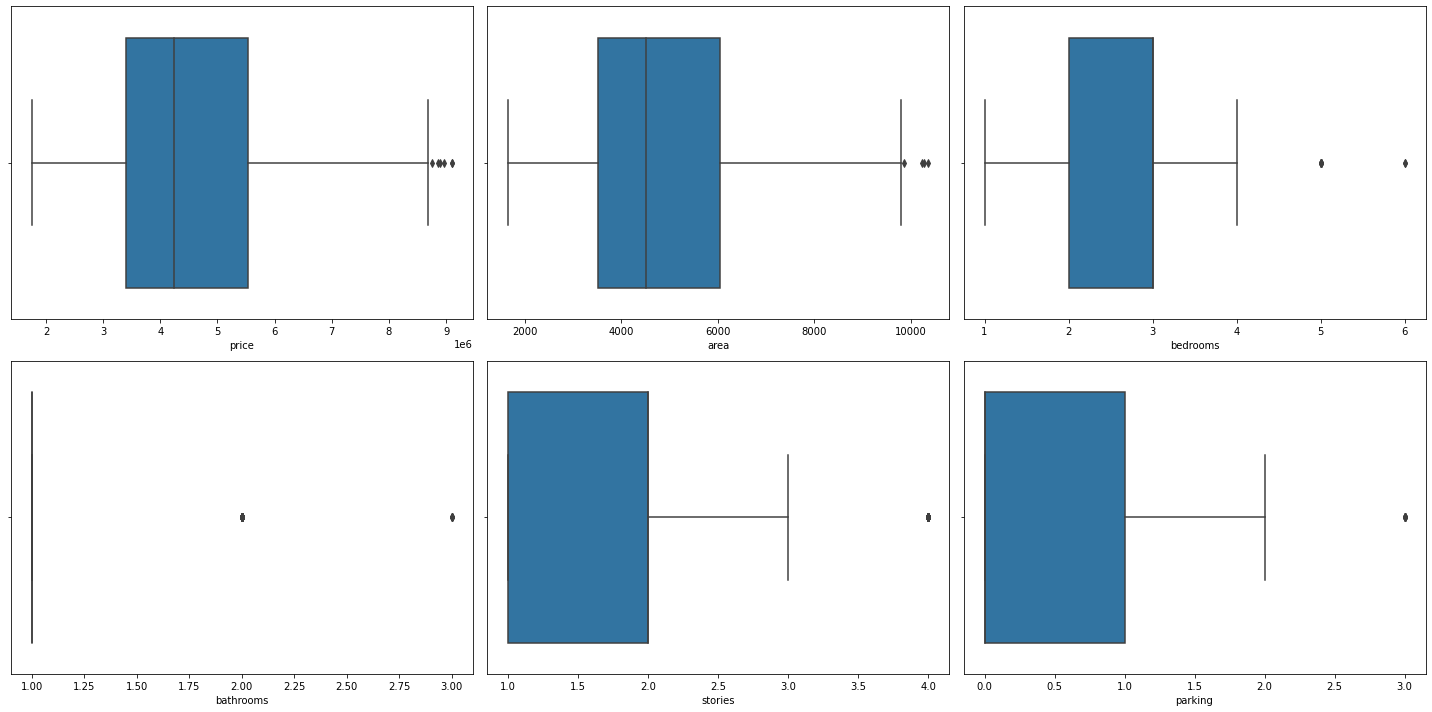

In [12]:
fig, axs = plt.subplots(2,3, figsize = (20,10))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

# Data Visualization
# Exploratory Data Analytics

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable
Visualising Numeric Variables.

Data visualization involves creating graphical representations of data to help uncover patterns, trends, and insights that may be challenging to discern from raw data alone. 

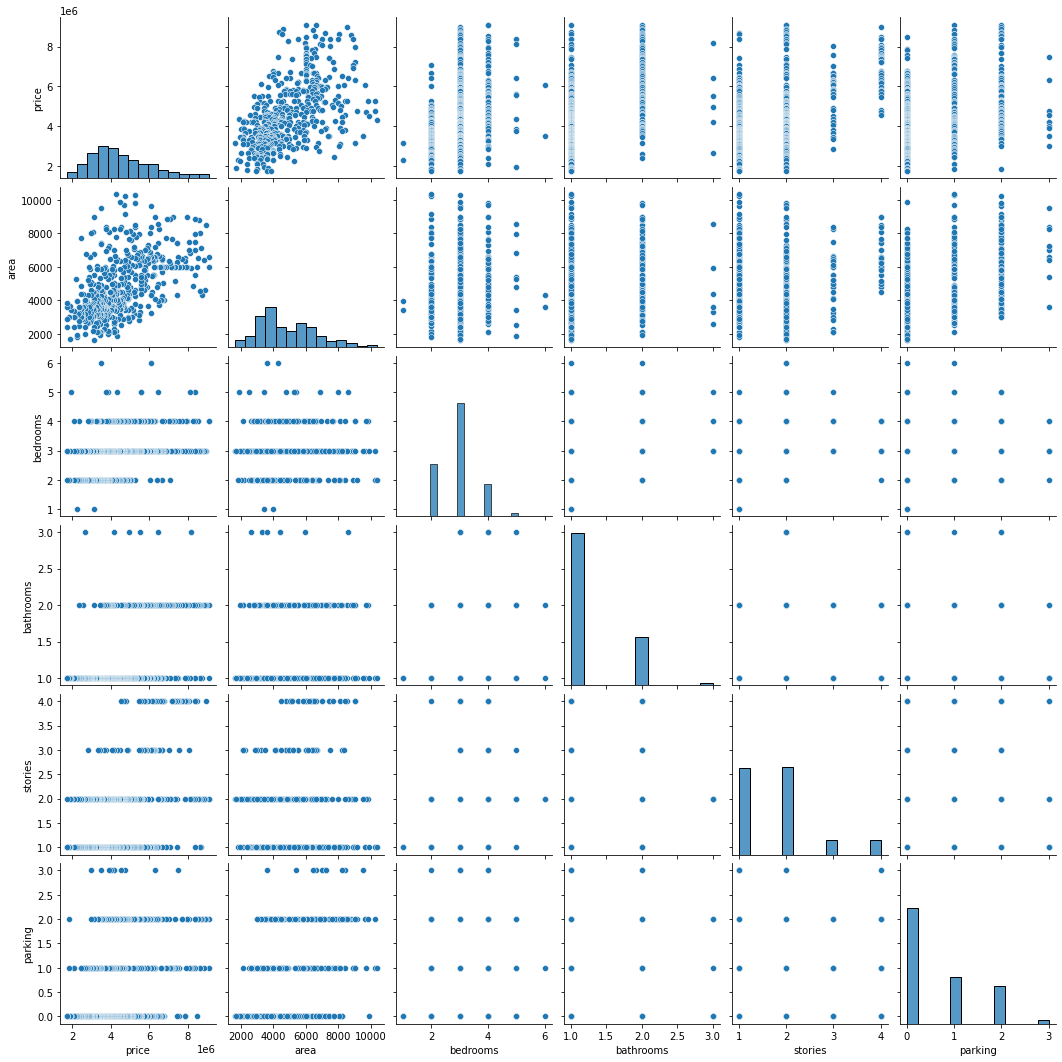

In [13]:
sns.pairplot(df)
plt.show()

Visualizing categorical variables is essential for understanding their impact on the target variable. Boxplots are effective for showing the distribution of a numerical variable across different categories.

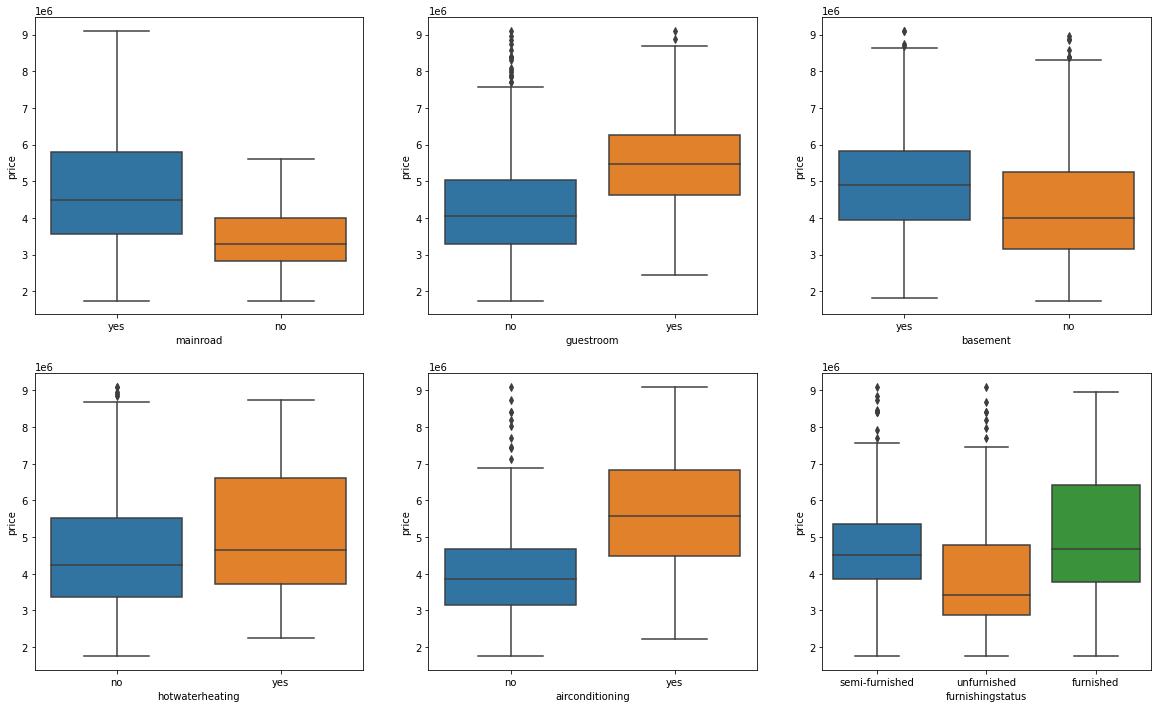

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data =df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

When visualizing categorical features, adding the hue parameter can help incorporate an additional categorical variable, providing more insights into the relationship. In this case, you want to visualize the 'furnishingstatus' with 'airconditioning' as the hue. 

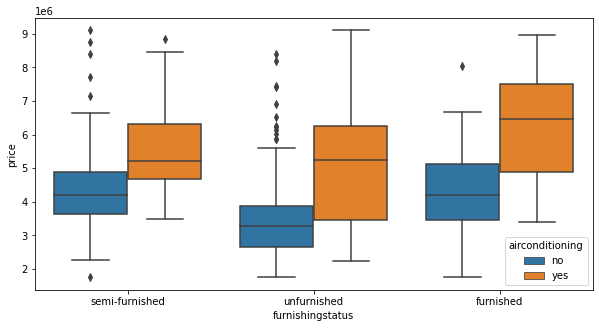

In [15]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)
plt.show()

# Data Preprocessing:

Data preprocessing is a crucial step in the data analysis and machine learning pipeline that involves cleaning, transforming, and organizing raw data into a format suitable for analysis or model training. The goal is to ensure that the data is accurate, complete, and relevant for the task at hand.

Converting categorical variables with 'Yes' and 'No' values to numerical format (1 for 'Yes' and 0 for 'No') is a common preprocessing step, especially when dealing with binary features in machine learning models. 

In [16]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [17]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


converting categorical variables with multiple levels into dummy variables is a common technique in regression analysis. Dummy variables represent each category as a binary (0 or 1) variable. In the case of 'furnishingstatus,' which has three levels, you would create two dummy variables to represent the three categories.

In [18]:
status = pd.get_dummies(df['furnishingstatus'])

In [19]:
status

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


In [20]:
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


you can drop one of the dummy variables created for 'furnishingstatus' to avoid multicollinearity, as the information about the third category can be inferred from the values of the first two.

drop(['furnishingstatus', 'furnishingstatus_semi-furnished'], axis=1) drops both the original 'furnishingstatus' column and one of the dummy variables.
Now, you have only one dummy variable ('furnishingstatus_unfurnished') for 'furnishingstatus,' and the type of furnishing can be identified by the presence of 0 or 1 in that column. Adjust the code based on your specific dataset and requirements.

In [21]:
# Let's drop the first column from status df using 'drop_first = True
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [22]:
# Add the results to the original housing dataframe
df = pd.concat([df, status], axis = 1)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [23]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [24]:
df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [25]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


# Train-Test Split:
The train-test split is a fundamental step in the machine learning workflow, specifically for supervised learning tasks. It involves dividing the dataset into two subsets: one for training the model and the other for testing its performance on unseen data. The primary purpose is to evaluate how well the model generalizes to new, unseen observations. 

In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

Rescaling features is important to ensure that all variables are on a comparable scale, preventing some variables from dominating others in the model training process. Min-Max scaling is a common method used to scale features to a specific range (usually between 0 and 1).
MinMaxScaler is used to scale features to a specific range.
fit_transform is applied to the training set to compute the minimum and maximum values needed for scaling and to transform the features accordingly.
transform is used on the testing set to scale it using the same computed minimum and maximum values from the training set.
Now, your features are scaled, and you can use the scaled sets (X_train_scaled and X_test_scaled) for training and evaluating your linear regression model. Adjust the code based on your specific dataset and requirements.

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [30]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1


In [31]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756,0.476454,0.304709
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264,0.500138,0.460923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation Analysis:
Correlation analysis is a statistical technique used to evaluate the strength and direction of the linear relationship between two quantitative variables. The correlation coefficient quantifies the degree to which changes in one variable are associated with changes in another

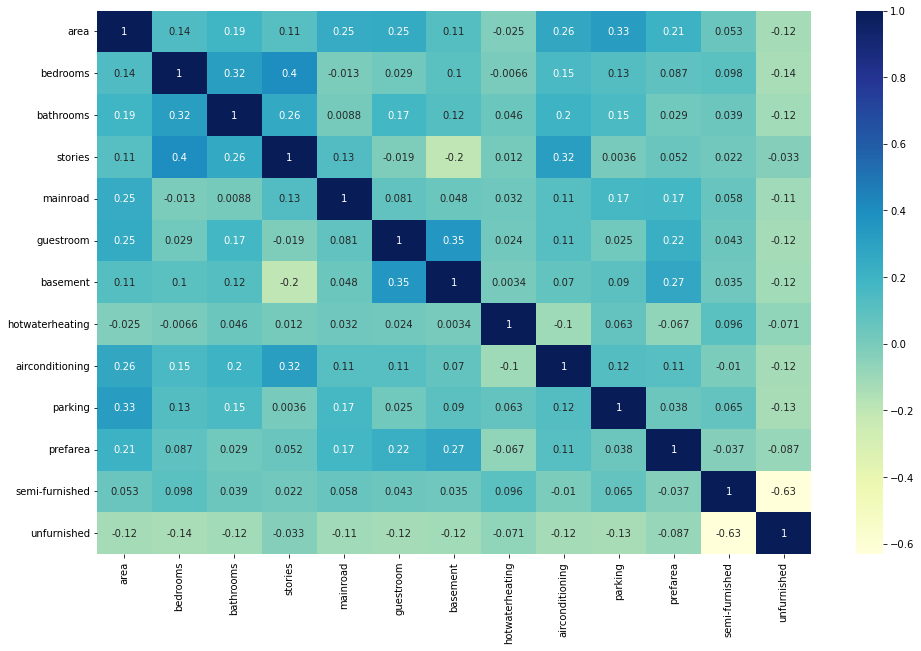

In [59]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

 Once the data is scaled and ready, you need to divide it into the input features (X) and the target variable (y). 

In [33]:
y_train = df_train.pop('price')
X_train = df_train

# Feature Selection using Recursive Feature Elimination (RFE):

the LinearRegression function from scikit-learn (SciKit Learn) is being used for building the linear regression model. This choice is made due to its compatibility with the Recursive Feature Elimination (RFE) utility from scikit-learn.


## LinearRegression Function:

The LinearRegression function is part of scikit-learn's linear model module and is used for fitting a linear regression model to the input features and target variable.
It's a straightforward implementation of linear regression and is compatible with various tools and utilities provided by scikit-learn.


## Compatibility with RFE:

Recursive Feature Elimination (RFE) is a feature selection technique provided by scikit-learn. It works by recursively removing the least important features until the desired number of features is reached.
The LinearRegression function is compatible with RFE, allowing you to use RFE for feature selection within the context of a linear regression model.
RFE can rank the importance of features based on the coefficients assigned by the linear regression model, and LinearRegression provides these coefficients.


Recursive Feature Elimination (RFE) is a feature selection technique commonly used in machine learning to identify and select the most important features for building a predictive model. The basic idea behind RFE is to iteratively remove the least significant features until the desired number of features is reached. 

In [34]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
# Importing RFE and LinearRegression
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 6
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=6)  # running RFE
rfe = rfe.fit(X_train, y_train)




In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 6),
 ('basement', False, 4),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 3)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'semi-furnished', 'unfurnished'],
      dtype='object')

# Building and Evaluating the Model:
Building and evaluating a predictive model involves several steps, from splitting the data into training and testing sets to training the model and assessing its performance. Below is a step-by-step guide on building and evaluating a model using linear regression, based on the earlier context of the project.

In [39]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [40]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [41]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [42]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Thu, 04 Jan 2024   Prob (F-statistic):           1.31e-69
Time:                        03:57:39   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.51
1,area,1.24
4,airconditioning,1.20
3,stories,1.17
5,parking,1.14
2,bathrooms,1.12
6,prefarea,1.05


Residual analysis is a crucial step in evaluating the performance of a linear regression model and ensuring that the assumptions of linear regression are met. The residual analysis involves examining the distribution of the error terms.


Error Terms:

In the context of linear regression, error terms represent the differences between the observed values (actual target variable values) and the predicted values by the model.
Residuals are calculated as actual values minus predicted values: 
Residual=Actual−Predicted.


Normal Distribution Assumption:

One of the key assumptions of linear regression is that the error terms are normally distributed. This means that the residuals should ideally follow a normal distribution.


Histogram of Residuals:

Plotting a histogram of the error terms allows us to visually inspect whether the distribution resembles a normal distribution.
A normal distribution would show a bell-shaped curve, indicating that the majority of residuals are clustered around zero, and fewer residuals deviate significantly from zero.


Interpretation:

If the histogram of the error terms exhibits a roughly symmetric and bell-shaped pattern, it suggests that the normal distribution assumption is being met.
Deviations from a normal distribution might indicate issues with the model or data that need further investigation.

In [45]:
y_train_price = lm.predict(X_train_rfe)

In [46]:
res = (y_train_price - y_train)

In [47]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

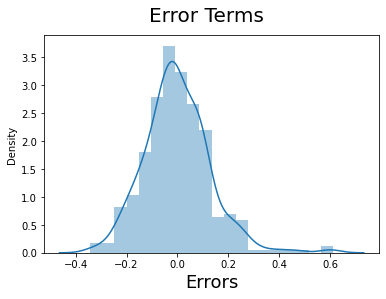

In [48]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

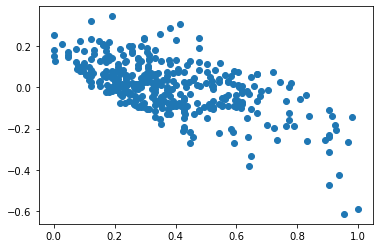

In [49]:
plt.scatter(y_train,res)
plt.show()

In [50]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [51]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [52]:
y_test = df_test.pop('price')
X_test = df_test

In [53]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [54]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

# Model Validation and Visualization:
Model validation is a crucial step to ensure that the trained model performs well on new, unseen data. Additionally, visualization can provide insights into the model's predictions and help assess its overall performance. Below is a step-by-step guide for model validation and visualization using a linear regression model.

In [55]:
# Making predictions
y_pred = lm.predict(X_test_rfe)

In [56]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.579124777439774

Text(0, 0.5, 'y_pred')

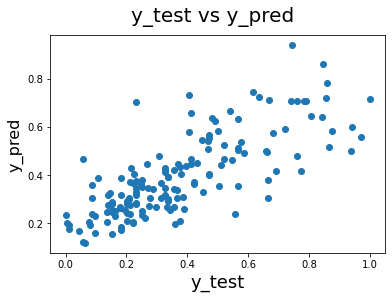

In [57]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

# Conclusion: Predicting House Prices with Linear Regression



In this project, we aimed to develop a predictive model using linear regression to estimate house prices based on relevant features in the dataset. Linear regression, a fundamental machine learning algorithm, was employed to build, evaluate, and interpret the predictive model. The key concepts and challenges addressed throughout the project are summarized below:



## Key Concepts:


Data Collection:
Obtaining a dataset with numerical features and a target variable for prediction was the initial step.
The dataset serves as the foundation for training and evaluating the predictive model.


Data Exploration and Cleaning:
Exploring the dataset involved understanding its structure, handling missing values, and ensuring data quality.
Cleaning the data set the stage for reliable model development and interpretation.


Feature Selection:
Identifying relevant features that contribute to the predictive model was crucial.
Assessing the correlation between features and the target variable guided the selection process.


Model Training:
Implementing linear regression using the Scikit-Learn library allowed us to build the predictive model.
The training process involved learning patterns and relationships within the data.


Model Evaluation:
Evaluating the model's performance on a separate test dataset was essential.
Metrics such as Mean Squared Error and R-squared were employed to quantify the model's predictive accuracy.


Visualization:
Creating visualizations illustrated the relationship between predicted and actual values.
Scatter plots, regression lines, and residual plots helped interpret the model's predictions.


## Learning Objectives:


This project provided a valuable learning experience with the following objectives:

Understanding Linear Regression Concepts:
Gained insights into the fundamental concepts of linear regression, including coefficients, residuals, and predictions.


Practical Model Implementation:
Acquired hands-on experience in implementing a predictive model using the Scikit-Learn library.Explored the entire machine learning workflow, from data preprocessing to model training and evaluation.


Model Evaluation and Interpretation:
Developed skills in evaluating model performance using relevant metrics.Interpreted the results to assess the model's ability to generalize to new, unseen data.


In conclusion, this project provided a comprehensive journey through the essential steps of developing and evaluating a linear regression model for predicting house prices. The hands-on experience gained contributes to a solid foundation in machine learning concepts and practical model implementation.